In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=00dd73bd88f8e83dfe96d073ec0ae5e8366d57e7ef251684ad745cd4bdfcd3f9
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-06-16 00:40:10.486062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 00:40:10.486188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 00:40:10.655602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# EDA

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

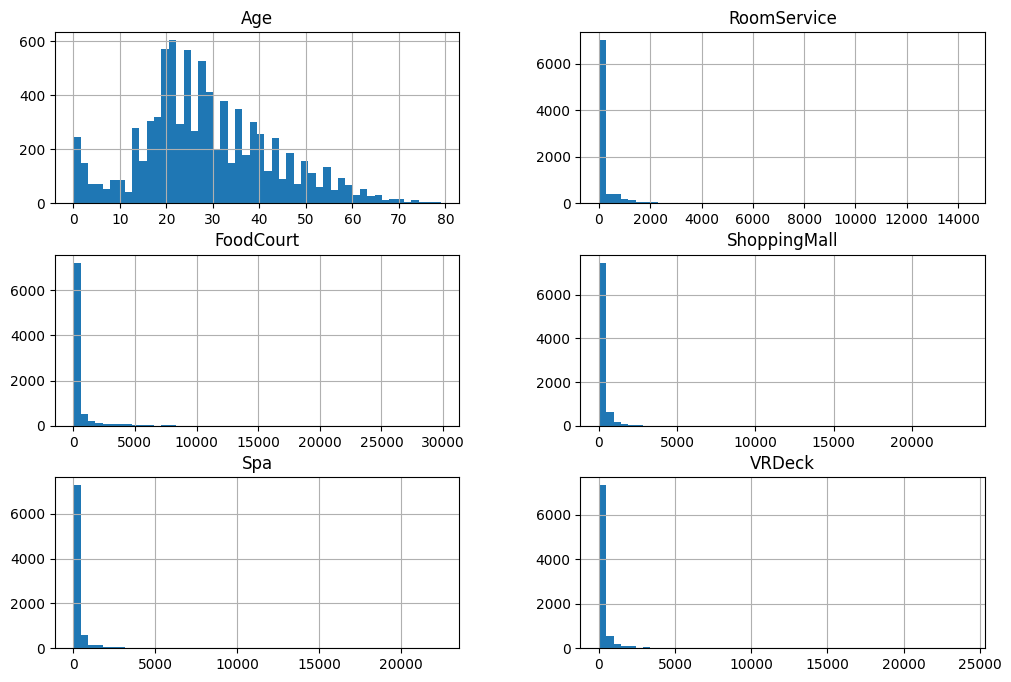

In [6]:
data.hist(bins=50, figsize=(12, 8))

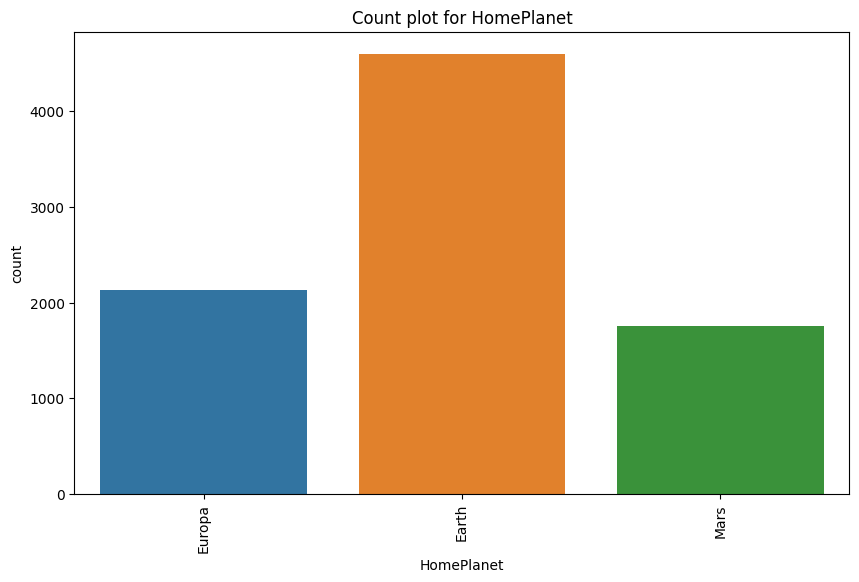

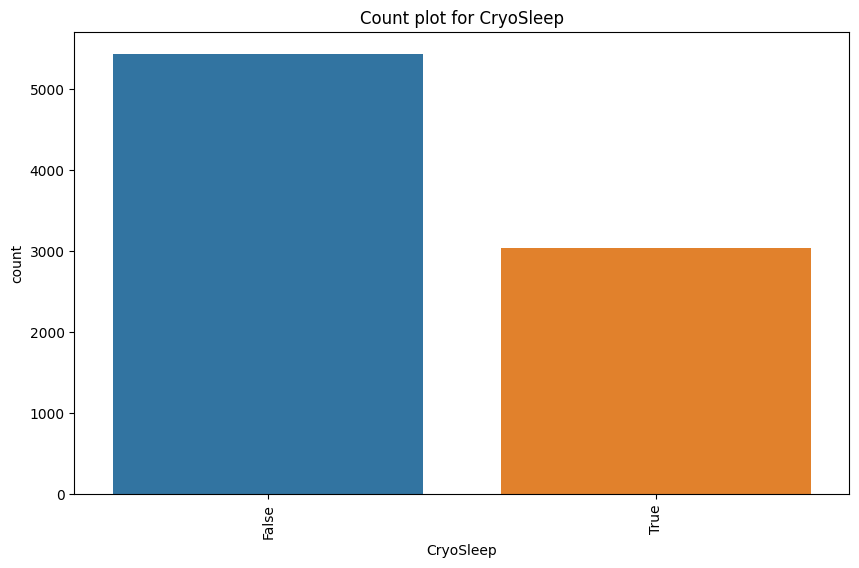

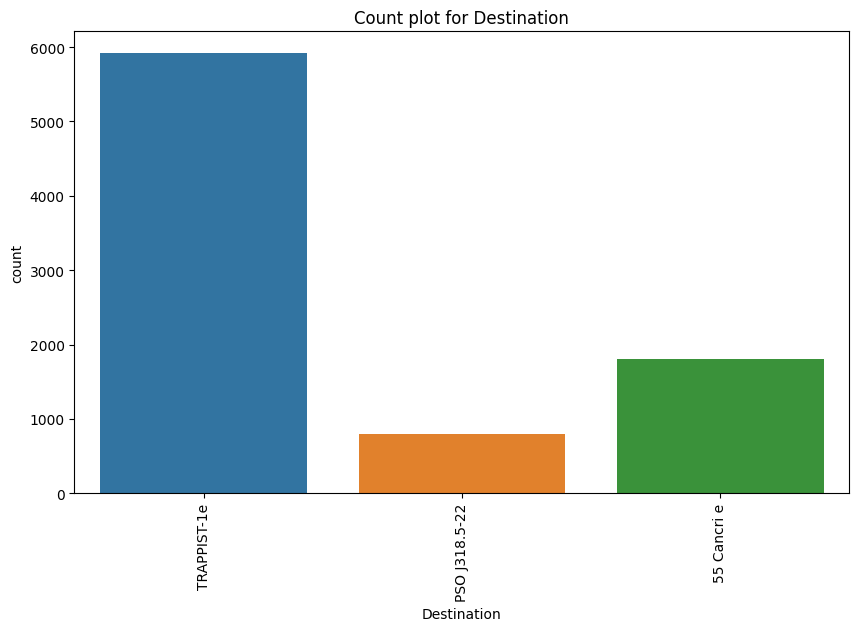

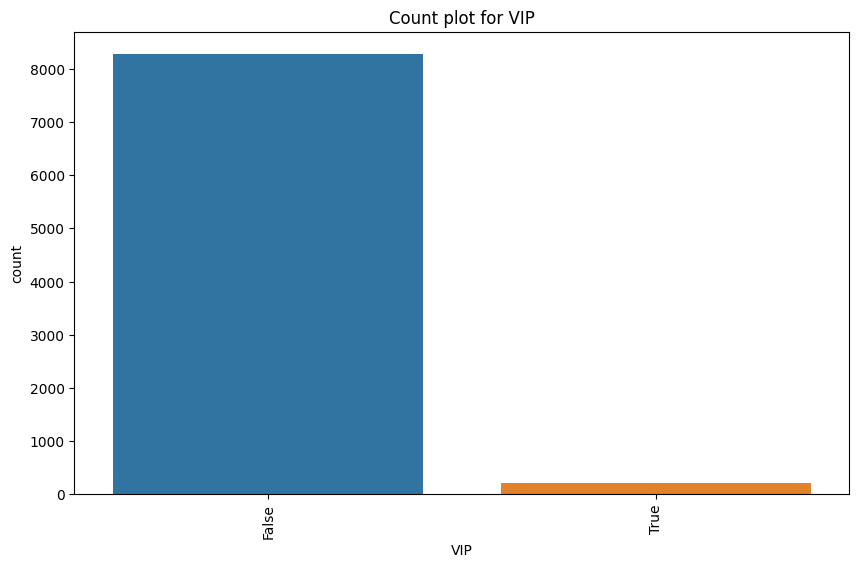

In [7]:
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

In [8]:
for col in data.columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for PassengerId:
PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64


Value counts for HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


Value counts for CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64


Value counts for Cabin:
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64


Value counts for Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


Value counts for Age:
Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64


Value 

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
space_s = train_set.copy()

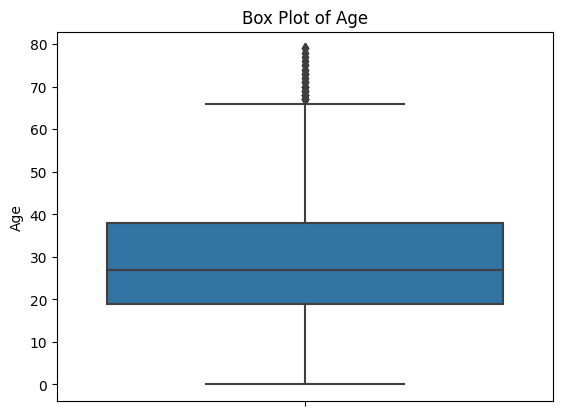

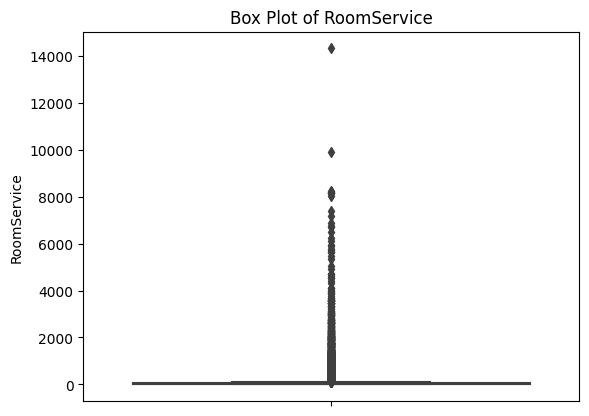

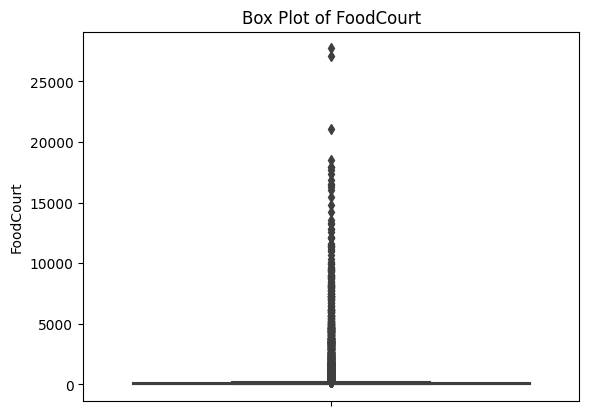

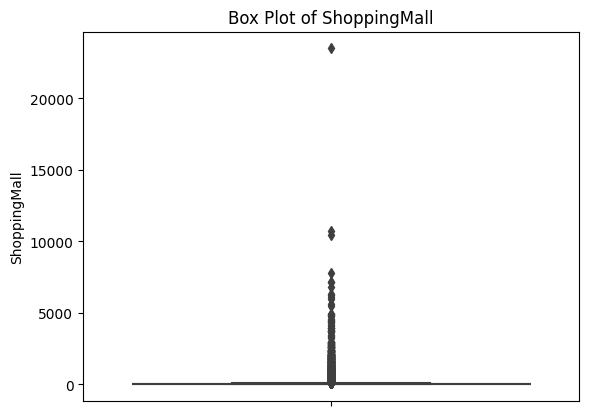

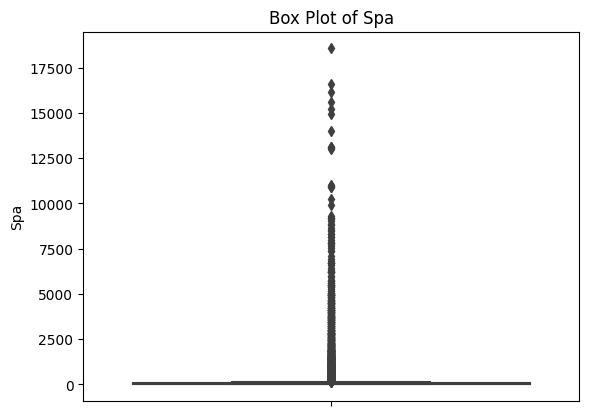

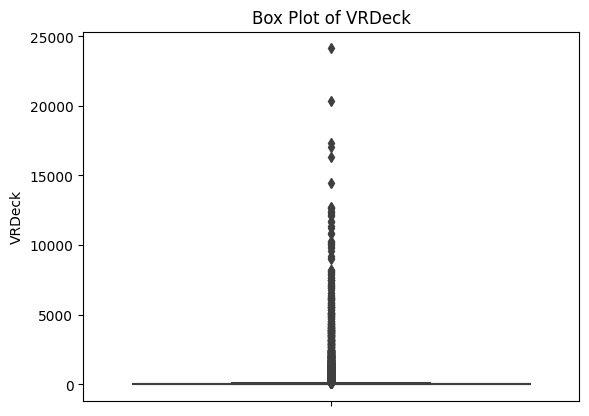

In [11]:
for column in space_s.select_dtypes(include='number').columns:
    sns.boxplot(y=space_s[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

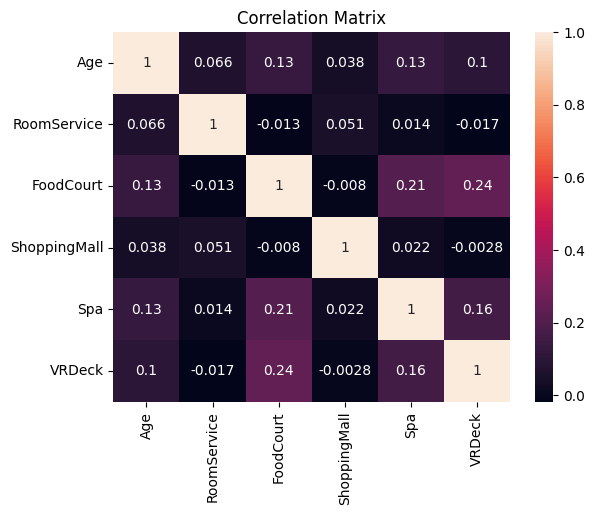

In [12]:
# Correlation Matrix
correlation_matrix = space_s.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Preprocesing

In [13]:
spaceX = data.drop('Transported', axis=1)
spacey = data['Transported'].copy()

In [14]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.pipeline import make_pipeline

def sum_features(X):
    return np.sum(X, axis=1).reshape(-1, 1)

def boolean_to_binary(X):
    return X.astype(int)

# Define age bins for bucketization
age_bins = [0, 18, 30, 50, 65, np.inf]


In [15]:
# Pipeline for categorical features
nm_cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

# Pipeline for numerical features
nm_num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler(),
)

# Pipeline for boolean features
boolean_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    FunctionTransformer(boolean_to_binary, validate=False)
)

# Pipeline for sum feature
sum_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    FunctionTransformer(sum_features, validate=False),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

# Pipeline for age bucketization
age_bucketizer_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    FunctionTransformer(lambda X: np.digitize(X, bins=age_bins), validate=False)
)

# Full preprocessing pipeline without 'Cabin' feature
preprocessor = ColumnTransformer([
    ('num', nm_num_pipeline, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),
    ('cat', nm_cat_pipeline, ['HomePlanet', 'Destination']),
    ('bool', boolean_pipeline, ['CryoSleep', 'VIP']),
    ('sum', sum_pipeline, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),
    ('age_bin', age_bucketizer_pipeline, ['Age']),
    ('drop_columns', 'drop', ['PassengerId', 'Name'])
])

set_config(display='diagram')

In [16]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['RoomService', 'FoodCourt', 'ShoppingMall',
                                  'Spa', 'VRDeck']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most...
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['RoomService', 'FoodCourt', 'ShoppingMall',
                                  'Spa', 'VRDeck']),
                                ('age_bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x796f1e5c2560>))]),
                                 ['Age']),
                                ('drop_columns', 'drop',
                                 ['PassengerId', 'Name'])])

# Choose The Model

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Fit and transform the data using the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(spaceX)

# Define a dictionary of models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_preprocessed, spacey, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression: 0.7704 ± 0.0085
Decision Tree: 0.7422 ± 0.0058
Random Forest: 0.7867 ± 0.0106
Gradient Boosting: 0.7940 ± 0.0093
Support Vector Machine: 0.7920 ± 0.0106
Neural Network: 0.7897 ± 0.0103


In [18]:
# Fit and transform the data using the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(spaceX)

# Convert to TensorFlow Dataset
def dataframe_to_dataset(X, y):
    y = np.array(y)
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    return dataset.batch(32)

# Example conversion
dataset = dataframe_to_dataset(X_preprocessed, spacey)